avg_temp              8.369474
SMA_10                8.343519
SMA_20                8.315215
avg_temp_amsterdam    9.131288
SMA_10_amsterdam      9.115405
SMA_20_amsterdam      9.086243
Name: averages of the date, dtype: float64


,year,avg_temp,year_ams,avg_temp_amsterdam
min,1752,5.78,1752,5.97
max,2015,9.83,2007,11.04


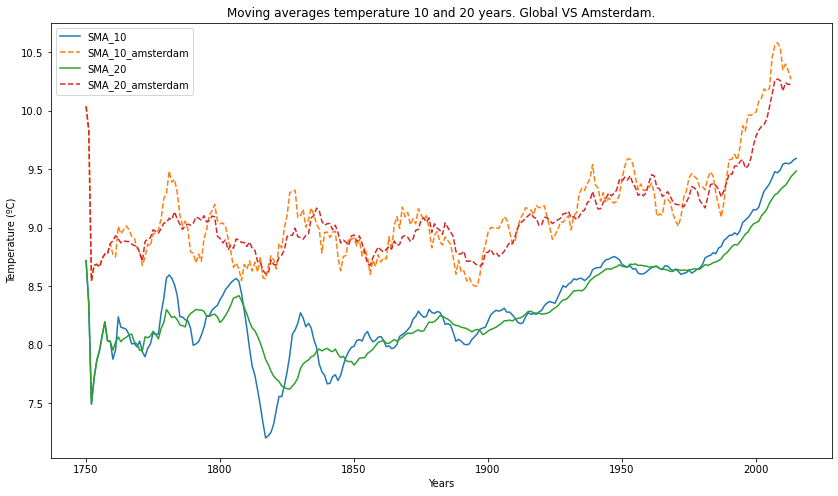

In [49]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Load the data
PROJECT = Path('D:/OneDrive - MVGM/WerkbestandenYannick/Werkmap_Python/Projecten/Udacity/project1')
df_ams = pd.read_csv(PROJECT / 'citydata.csv')
df_glob = pd.read_csv(PROJECT / 'globaldata.csv')

#Set index and adjust dataframe
df_ams = df_ams[['year','avg_temp']]
df_ams = df_ams[df_ams.year >= 1750].set_index('year')
df_glob = df_glob.set_index('year')

# Add the Simple Moving Averages
def add_sma(df, period):
    df[f'SMA_{period}'] = df.avg_temp.rolling(period, min_periods=1).mean()
    return df

sma_periods = [10*y for y in range(1,3)]
for sma_period in sma_periods:
    df_ams = add_sma(df_ams,sma_period)
    df_glob = add_sma(df_glob,sma_period)

#merge the dfs
df = df_glob.join(df_ams, how='outer', rsuffix='_amsterdam')
df = df.reset_index()

print(df.mean().rename('averages of the date')[1:])

minmax_glob = pd.concat([df[df.avg_temp == df.avg_temp.min()][['year','avg_temp']].rename(index={2:'min'}), 
         df[df.avg_temp == df.avg_temp.max()][['year','avg_temp']].rename(index={265:'max'})])
minmax_ams = pd.concat([df[df.avg_temp_amsterdam == df.avg_temp_amsterdam.min()][['year','avg_temp_amsterdam']].rename(index={2:'min'}), 
           df[df.avg_temp_amsterdam == df.avg_temp_amsterdam.max()][['year','avg_temp_amsterdam']].rename(index={257:'max'})])

display(minmax_glob.join(minmax_ams, rsuffix='_ams'))

#Visualize
plt.figure(figsize=(14,8))
plt.title('Moving averages temperature 10 and 20 years. Global VS Amsterdam.')
plt.xlabel("Years")
plt.ylabel("Temperature (ºC)")
for sma_period in sma_periods:
    plt.plot('year', f"SMA_{sma_period}", data=df)
    plt.plot('year', f"SMA_{sma_period}_amsterdam", data=df, linestyle='dashed')
plt.legend()
plt.show()

avg_temp              8.369474
SMA_10                8.343519
SMA_20                8.315215
avg_temp_amsterdam    9.131288
SMA_10_amsterdam      9.115405
SMA_20_amsterdam      9.086243
Name: averages of the date, dtype: float64


,year,avg_temp,year_ams,avg_temp_amsterdam
min,1752,5.78,1752,5.97
max,2015,9.83,2007,11.04


In [17]:
df[['avg_temp','avg_temp_amsterdam']].describe()

,avg_temp,avg_temp_amsterdam
count,266.000000,264.000000
mean,8.369474,9.131288
std,0.584747,0.770730
min,5.780000,5.970000
25%,8.082500,8.640000
50%,8.375000,9.140000
75%,8.707500,9.632500
max,9.830000,11.040000


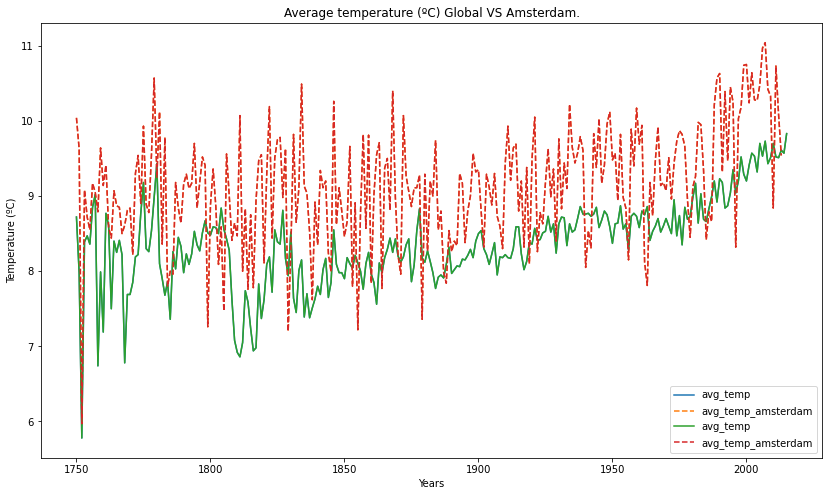

In [12]:
#Visualize
plt.figure(figsize=(14,8))
plt.title('Average temperature (ºC) Global VS Amsterdam.')
plt.xlabel("Years")
plt.ylabel("Temperature (ºC)")
for sma_period in sma_periods:
    plt.plot('year', "avg_temp", data=df)
    plt.plot('year', "avg_temp_amsterdam", data=df, linestyle='dashed')
plt.legend()
plt.show()

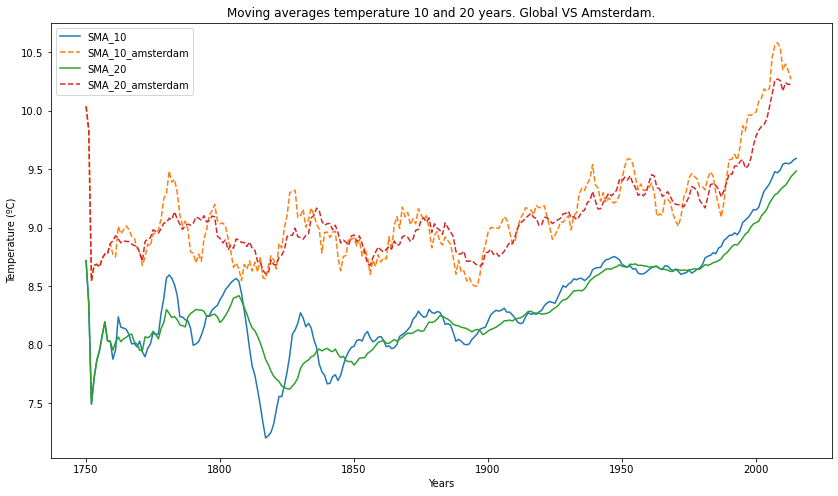

In [48]:
#Visualize
plt.figure(figsize=(14,8))
plt.title('Moving averages temperature 10 and 20 years. Global VS Amsterdam.')
plt.xlabel("Years")
plt.ylabel("Temperature (ºC)")
for sma_period in sma_periods:
    plt.plot('year', f"SMA_{sma_period}", data=df)
    plt.plot('year', f"SMA_{sma_period}_amsterdam", data=df, linestyle='dashed')
plt.legend()
plt.show()

In [66]:
df.head(10)

,year,avg_temp,SMA_10,SMA_20,SMA_30,SMA_40,avg_temp_amsterdam,SMA_10_amsterdam,SMA_20_amsterdam,SMA_30_amsterdam,SMA_40_amsterdam
0,1750,8.72,8.720000,8.720000,8.720000,8.720000,10.04,10.040000,10.040000,10.040000,10.040000
1,1751,7.98,8.350000,8.350000,8.350000,8.350000,9.63,9.835000,9.835000,9.835000,9.835000
2,1752,5.78,7.493333,7.493333,7.493333,7.493333,5.97,8.546667,8.546667,8.546667,8.546667
3,1753,8.39,7.717500,7.717500,7.717500,7.717500,9.08,8.680000,8.680000,8.680000,8.680000
4,1754,8.47,7.868000,7.868000,7.868000,7.868000,8.72,8.688000,8.688000,8.688000,8.688000
5,1755,8.36,7.950000,7.950000,7.950000,7.950000,8.55,8.665000,8.665000,8.665000,8.665000
6,1756,8.85,8.078571,8.078571,8.078571,8.078571,9.17,8.737143,8.737143,8.737143,8.737143
7,1757,9.02,8.196250,8.196250,8.196250,8.196250,9.05,8.776250,8.776250,8.776250,8.776250
8,1758,6.74,8.034444,8.034444,8.034444,8.034444,8.79,8.777778,8.777778,8.777778,8.777778
9,1759,7.99,8.030000,8.030000,8.030000,8.030000,9.64,8.864000,8.864000,8.864000,8.864000


In [42]:
df.columns

Index(['year', 'avg_temp', 'SMA_10', 'SMA_20', 'SMA_30', 'SMA_40',
       'avg_temp_amsterdam', 'SMA_10_amsterdam', 'SMA_20_amsterdam',
       'SMA_30_amsterdam', 'SMA_40_amsterdam'],
      dtype='object')

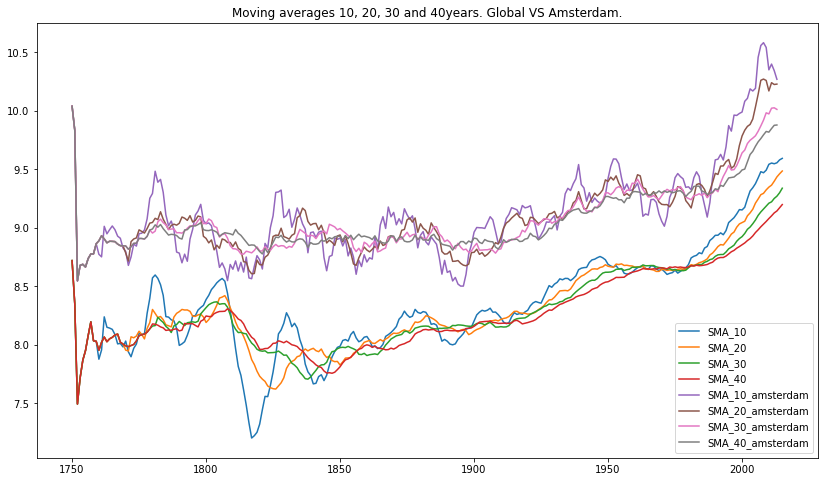

In [62]:
df.corr()

,year,avg_temp,SMA_10,SMA_20,SMA_30,SMA_40,avg_temp_amsterdam,SMA_10_amsterdam,SMA_20_amsterdam,SMA_30_amsterdam,SMA_40_amsterdam
year,1.000000,0.622775,0.739465,0.778916,0.786158,0.785550,0.370552,0.628096,0.660092,0.680579,0.682887
avg_temp,0.622775,1.000000,0.790966,0.744362,0.763114,0.731153,0.516804,0.706395,0.691476,0.700817,0.683799
SMA_10,0.739465,0.790966,1.000000,0.937680,0.925700,0.908499,0.449935,0.844528,0.862729,0.862124,0.860888
SMA_20,0.778916,0.744362,0.937680,1.000000,0.975349,0.964871,0.453192,0.804999,0.882753,0.899866,0.900239
SMA_30,0.786158,0.763114,0.925700,0.975349,1.000000,0.984379,0.451467,0.801072,0.856048,0.900417,0.909463
SMA_40,0.785550,0.731153,0.908499,0.964871,0.984379,1.000000,0.459250,0.798202,0.851924,0.885348,0.911668
avg_temp_amsterdam,0.370552,0.516804,0.449935,0.453192,0.451467,0.459250,1.000000,0.555839,0.523840,0.491000,0.499194
SMA_10_amsterdam,0.628096,0.706395,0.844528,0.804999,0.801072,0.798202,0.555839,1.000000,0.934928,0.897731,0.880303
SMA_20_amsterdam,0.660092,0.691476,0.862729,0.882753,0.856048,0.851924,0.523840,0.934928,1.000000,0.965144,0.941018
SMA_30_amsterdam,0.680579,0.700817,0.862124,0.899866,0.900417,0.885348,0.491000,0.897731,0.965144,1.000000,0.977905


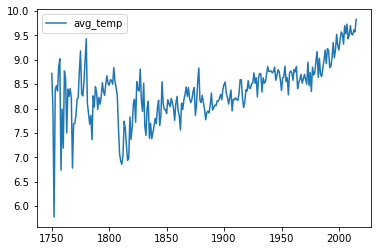

In [33]:
plt.plot('year','avg_temp', data = df)
plt.legend()
plt.show()